Contents

+ [Import the data](#import-data)
+ [Understand the data](#understand-data)
    + [AIS data in general](#ais-data)
    + [Dynamic data](#dynamic-data)
    + [Static data](#static-data)
    + [Comparison of dynamic and static datasets](#compare-data)
    + [More information and quiz](#quiz)
+ [Examine the dataset](#vis-data)

In [1]:
# Cell to hide - just an option

import pandas as pd
pd.set_option('display.max_columns', 27)

In this part, we will explore the topic of data quality in a numerically based dataset. As an example, we are are using AIS data (Automatic Identification System), coming from an automatic tracking system for ships.

## Import the data <a class="anchor" id="import-data"></a>

Before anything else, we will take a look at the data we will work with in this section. Let's start by importing the datasets, using the function [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) from the library [Pandas](https://pandas.pydata.org/). We will use two datasets containing AIS data.

In [2]:
import pandas as pd

dynamic_data = pd.read_csv('./dynamic_data.csv')
static_data = pd.read_csv('./static_data.csv')

These data have been imported from the U.S. Marine Cadastre website and is publicly available here: https://marinecadastre.gov/ais/. The datasets used here are a slightly modified version of the raw datasets available on the website, to match the needs of this course. For more information about the modifications done to these datasets, visit __TODO(write modifications done)__.

## Understand the data <a class="anchor" id="understand-data"></a>

When dealing with any data related problem, the first step is to fully understand the data we are using. This means knowing what the data represent and understand the meaning of each attribute.

In addition, some important points must be known by the scientist using the data for a problem, specifically:
* where the data come from: which open organism, company, person, collected the data in the first place.
* when the data have been collected: most data can vary over time (for example, the number of passengers using a transportation service will vary over the years in an expanding city).
* the range of the data: for example, for geographical data, the area of collection has to be known.
* how the data have been acquired: the data might have been recorded with sensors or hand tools, collected by person through forms, automatically created with a software, ...
* if the data have been previously modified: the organism that collected the data in the first place might have done a work of preprocessing before handing them over to further partners.

### AIS data in general <a class="anchor" id="ais-data"></a>

Most navigating vessel today in the world must be equiped with an AIS (Automatic Identification System) transponder which sends information about the ships's status and position at regular intervals of time (every 1 to 3 minutes). The data is collected by coastal stations and other ships, message after message. A message is sent at a certain timestamp by a certain ship, and can contain either static or dynamic information about the ship and the trip it is currently on.

The dynamic information are information that may change every time a new message is sent, such as the speed of the ship, its heading, or its position (latitude and longitude). The static information stay the same for the whole trip of one ship, for example the identification of the ship (MMSI), the destination information, the type of the ship, ...

__TODO: add Thomas' video (1st)__

In this part, you have the role of a data analyst in charge of examining and working with AIS data collected from a coastal station next to Seattle (United States). The data we are using in this lecture have been collected by the U.S. Marine Cadastre on the 1st of January 2017, on the area [UTM10](https://marinecadastre.gov/AIS/AIS%20Documents/UTMZoneMap2014.png) (west coast of the United States and Canada). The exact latitude range is ``[32.20937 ; 49.89074]`` and the longitude range is ``[-125.99859 ; -120.00242]``, which is comprised in this area:

![text](1-1-data_area.JPG)

This area, being on the coast, contains several harbours, which makes it interesting for our use.

### Dynamic data <a class="anchor" id="dynamic-data"></a>

The function [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) allows you to print the first elements of a pandas DataFrame. The data you have to work with look like this:

In [3]:
dynamic_data.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,TripID,DepTime,ArrTime,DepLat,DepLon,ArrLat,ArrLon,DepCountry,DepCity,ArrCountry,ArrCity
0,367114690,2017-01-01 00:00:06,48.51094,-122.60705,0.0,-49.6,511.0,NaN,NaN,NaN,NaN,under way using engine,NaN,NaN,NaN,1,2017-01-01 00:00:06,2017-01-01 02:40:45,48.51094,-122.60705,48.51095,-122.60705,US,Anacortes,US,Anacortes
1,367479990,2017-01-01 00:00:03,48.15891,-122.67268,0.1,10.1,353.0,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,moored,83.39,19.5,3.2,2,2017-01-01 00:00:03,2017-01-01 02:40:44,48.15891,-122.67268,48.11099,-122.75885,US,Coupeville,US,Port Townsend
2,368319000,2017-01-01 00:00:08,43.34576,-124.32142,0.0,32.8,173.0,NaN,NaN,NaN,NaN,engaged in fishing,NaN,NaN,NaN,3,2017-01-01 00:00:08,2017-01-01 02:44:48,43.34576,-124.32142,43.34578,-124.32141,US,Barview,US,Barview
3,367154100,2017-01-01 00:00:15,46.74264,-124.93125,6.8,6.0,352.0,NaN,NaN,NaN,NaN,undefined,NaN,NaN,NaN,4,2017-01-01 00:00:15,2017-01-01 02:33:28,46.74264,-124.93125,47.02928,-124.95153,US,Ocean Shores,US,Ocean Shores
4,367446870,2017-01-01 00:00:59,48.51320,-122.60718,0.0,23.2,511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2017-01-01 00:00:59,2017-01-01 02:42:54,48.51320,-122.60718,48.51318,-122.60699,US,Anacortes,US,Anacortes


This dataset contains a mix of dynamic and static attributes, as explained earlier. The mention _artificially created from original data_ means that this attribute was added by us to the data downloaded 

Static attributes:

+ __MMSI__: unique 9-digit [identification code](https://www.navcen.uscg.gov/?pageName=mtMmsi) of the ship - numeric
+ __VesselName__: name of the ship - string
+ __IMO__: unique 7-digit [international identification number](https://imonumbers.lrfairplay.com/), that remains unchanged after the transfer of the ship's registration to another country - numeric
+ __CallSign__: unique callsign of the ship - string
+ __VesselType__: type of the ship, numerically coded, see [here](https://coast.noaa.gov/data/marinecadastre/ais/VesselTypeCodes2018.pdf) for details - numeric
+ __Length__: length of the ship, in meters - numeric
+ __Width__: width of the ship, in meters - numeric
+ __Draft__: vertical distance between the waterline and the bottom of the hull of the ship, in meters. For one ship, varies with the load of the ship and the density of the water - numeric
+ __TripID__: (_artificially created from original data_) unique ID for the trip - numeric
+ __DepTime__: (_artificially created from original data_) departure time for the trip - datetime
+ __ArrTime__: (_artificially created from original data_) arrival time for the trip - datetime
+ __DepLat__: (_artificially created from original data_) departure latitude for the trip - numeric
+ __DepLon__: (_artificially created from original data_) departure longitude for the trip - numeric
+ __ArrLat__: (_artificially created from original data_) arrival latitude for the trip - numeric
+ __ArrLon__: (_artificially created from original data_) arrival longitude for the trip - numeric
+ __DepCountry__: (_artificially created from original data_) departure country for the trip - string
+ __DepCity__: (_artificially created from original data_) departure city for the trip - string
+ __ArrCountry__: (_artificially created from original data_) arrival country for the trip - string
+ __ArrCity__: (_artificially created from original data_) arrival city for the trip - string

Dynamic attributes:

+ __BaseDateTime__: timestamp of the AIS message - datetime
+ __LAT__: latitude of the ship - numeric
+ __LON__: longitude of the ship - numeric
+ __SOG__: speed over ground, in knots - numeric
+ __COG__: course over ground, direction relative to the absolute North, in degrees (0 to 360) - numeric
+ __Heading__: heading of the ship - numeric
+ __Status__: status of the ship - string

__TODO: add Thomas' video (2nd)__

### Static data <a class="anchor" id="static-data"></a>

From the AIS data collected on the Marine Cadastre Website, we have created a smaller dataset containing only the static data of the trips. This will allow you to compare and analyze the trips as entities. Let's have a look at these data.

In [4]:
static_data.head()

,TripID,MMSI,MeanSOG,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,DepTime,ArrTime,DepLat,DepLon,ArrLat,ArrLon,DepCountry,DepCity,ArrCountry,ArrCity,Duration
0,1,367114690,0.000000,NaN,NaN,NaN,NaN,under way using engine,NaN,NaN,NaN,NaN,2017-01-01 00:00:06,2017-01-01 02:40:45,48.51094,-122.60705,48.51095,-122.60705,US,Anacortes,US,Anacortes,0 days 02:40:39
1,2,367479990,6.536585,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,moored,83.39,19.5,3.2,NaN,2017-01-01 00:00:03,2017-01-01 02:40:44,48.15891,-122.67268,48.11099,-122.75885,US,Coupeville,US,Port Townsend,0 days 02:40:41
2,3,368319000,0.000758,NaN,NaN,NaN,NaN,engaged in fishing,NaN,NaN,NaN,NaN,2017-01-01 00:00:08,2017-01-01 02:44:48,43.34576,-124.32142,43.34578,-124.32141,US,Barview,US,Barview,0 days 02:44:40
3,4,367154100,6.871111,NaN,NaN,NaN,NaN,undefined,NaN,NaN,NaN,NaN,2017-01-01 00:00:15,2017-01-01 02:33:28,46.74264,-124.93125,47.02928,-124.95153,US,Ocean Shores,US,Ocean Shores,0 days 02:33:13
4,5,367446870,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:59,2017-01-01 02:42:54,48.51320,-122.60718,48.51318,-122.60699,US,Anacortes,US,Anacortes,0 days 02:41:55


As you can see, most of the attributes are the same as for the dynamic data, only the dynamic attributes (like timestamp, latitude, longitude, speed and heading) have disappeared.

Two attributes are new here:
+ __MeanSOG__: the mean of the value of the SOG attribute for all the points in the trip.
+ __Duration__: the total duration of the tracked trip.

### Comparison of dynamic and static datasets <a class="anchor" id="compare-data"></a>

This dataset is built from the same data as the dynamic dataset and therefore contains the same data.

We can verify that by comparing the MMSIs of the ships tracked in both datasets. For that, we collect the unique values of the attribute MMSI in both datasets with the function [unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html). We could then print the two lists, but as they both contain 1520 values, we will check the difference between both by using two loops and printing the elements that are present in one list and not in the other.

In [5]:
# Get the unique MMSI values in both datasets
dynamic_mmsi = dynamic_data['MMSI'].unique()
static_mmsi = static_data['MMSI'].unique()

# Print the two lists
print('dynamic: ' + str(dynamic_mmsi))
print('static: ' + str(static_mmsi))

# Check for elements in dynamic_mmsi that are not in static_mmsi
diff1 = []
for element in dynamic_mmsi:
    if element not in static_mmsi:
        diff1.append(element)
print('diff1: ' + str(diff1))
        
# Check for elements in static_mmsi that are not in dynamic_mmsi
diff2 = []
for element in static_mmsi:
    if element not in dynamic_mmsi:
        diff2.append(element)
print('diff2: ' + str(diff2))

dynamic: [367114690 367479990 368319000 ... 367417230 316021258 316021259]
static: [367114690 367479990 368319000 ... 367417230 316021258 316021259]
diff1: []
diff2: []


To simply understand the difference between the datasets, let's have a look at their lengths with the function [len()](https://docs.python.org/3/library/functions.html#len).

In [6]:
len(dynamic_data)

100000

In [7]:
len(static_data)

1520

Finally, we can understand that each element in the static dataset contains the information of one trip in the dynamic data by printing the number of different MMSI values in the dynamic dataset:

In [8]:
len(dynamic_data['MMSI'].unique())

1520

### More information and quiz <a class="anchor" id="quiz"></a>

For more information about AIS data:
* [US coast guard page about AIS](https://www.navcen.uscg.gov/?pageName=AISmain)
* [all about AIS](http://www.allaboutais.com/index.php/en/)
* [official report on AIS data](https://www.itu.int/dms_pubrec/itu-r/rec/m/R-REC-M.1371-5-201402-I!!PDF-E.pdf)

<iframe src="https://h5p.org/h5p/embed/741872" width="694" height="600" frameborder="0" allowfullscreen="allowfullscreen"></iframe><script src="https://h5p.org/sites/all/modules/h5p/library/js/h5p-resizer.js" charset="UTF-8"></script>

## Examine the dataset <a class="anchor" id="vis-data"></a>

In [9]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 23 columns):
TripID        1520 non-null int64
MMSI          1520 non-null int64
MeanSOG       1520 non-null float64
VesselName    1442 non-null object
IMO           538 non-null object
CallSign      1137 non-null object
VesselType    1287 non-null float64
Status        762 non-null object
Length        1220 non-null float64
Width         911 non-null float64
Draft         496 non-null float64
Cargo         378 non-null float64
DepTime       1520 non-null object
ArrTime       1520 non-null object
DepLat        1520 non-null float64
DepLon        1520 non-null float64
ArrLat        1520 non-null float64
ArrLon        1520 non-null float64
DepCountry    1520 non-null object
DepCity       1520 non-null object
ArrCountry    1520 non-null object
ArrCity       1520 non-null object
Duration      1520 non-null object
dtypes: float64(10), int64(2), object(11)
memory usage: 273.2+ KB


In [10]:
static_data.describe()

,TripID,MMSI,MeanSOG,VesselType,Length,Width,Draft,Cargo,DepLat,DepLon,ArrLat,ArrLon
count,1520.000000,1.520000e+03,1520.000000,1287.000000,1220.000000,911.000000,496.000000,378.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,760.500000,3.597421e+08,1.034825,971.680653,56.769590,13.104501,6.457056,50.515873,46.354331,-122.868905,46.353671,-122.871346
std,438.930518,6.263661e+07,2.936439,198.957887,74.739358,10.903338,4.607529,22.693810,3.766705,0.681947,3.762056,0.680604
min,1.000000,3.160089e+06,-0.100000,0.000000,6.710000,0.000000,0.000000,0.000000,32.220640,-125.995610,32.209370,-125.998590
25%,380.750000,3.380724e+08,0.000000,1004.000000,14.840000,5.500000,3.000000,31.000000,46.168652,-123.178480,46.168460,-123.168262
50%,760.500000,3.669802e+08,0.012633,1019.000000,22.340000,8.000000,4.650000,52.000000,47.647795,-122.651365,47.646925,-122.645290
75%,1140.250000,3.675663e+08,0.072000,1019.000000,41.277500,16.350000,10.025000,70.000000,48.656940,-122.386562,48.665710,-122.386607
max,1520.000000,9.876543e+08,20.360811,1025.000000,349.000000,50.000000,18.800000,99.000000,49.890740,-120.002920,49.832120,-120.002420


In [11]:
static_data['MMSI'].plot.hist()

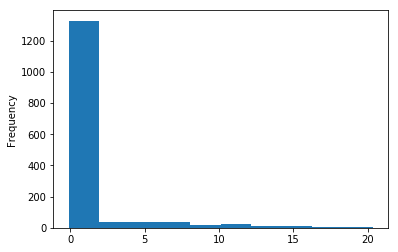

In [12]:
static_data['MeanSOG'].plot.hist()

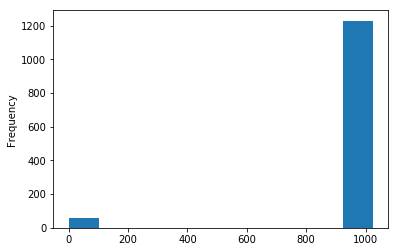

In [13]:
static_data['VesselType'].plot.hist()

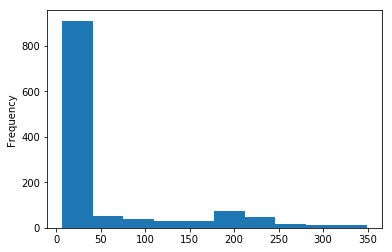

In [14]:
static_data['Length'].plot.hist()

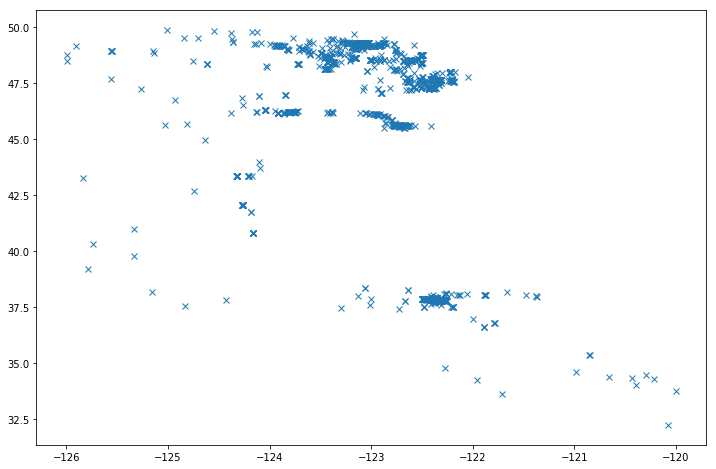

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.plot(static_data['DepLon'], static_data['DepLat'], 'x')

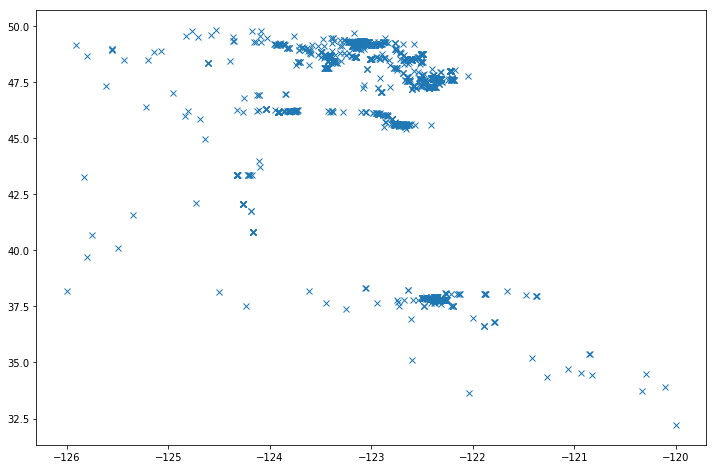

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(static_data['ArrLon'], static_data['ArrLat'], 'x')

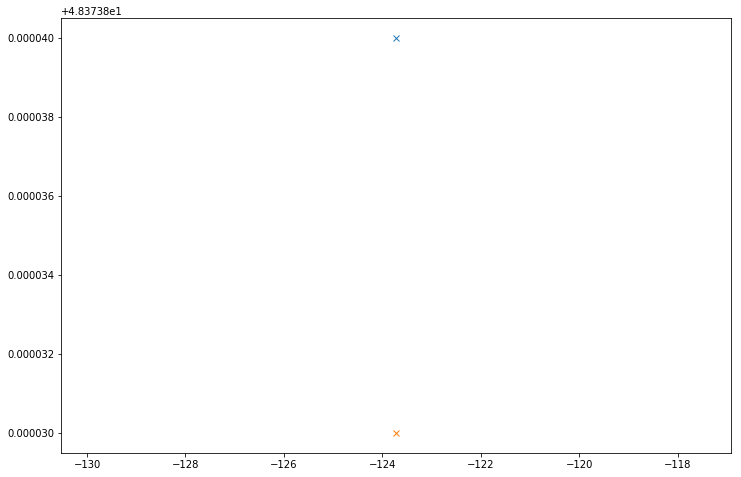

In [17]:
# for one trip

trip = static_data.loc[static_data['TripID'] == 55]

plt.figure(figsize = (12, 8))
plt.plot(trip['DepLon'], trip['DepLat'], 'x')
plt.plot(trip['ArrLon'], trip['ArrLat'], 'x')

Small quiz about the visualization of the data: what can we see from the plots? From the counts of the rows? etc

Examples:
+ the attribute x counts x missing values
+ the attribute x seems to contain some wrong values
+ x% of ships seem immobile
+ there are x% of passenger ships
+ etc...